### Neural Networks
A deep neural network is a layered representation of data. The term "deep" refers to the presence of multiple layers. Core learning algorithms (like linear regression) data was not transformed or modified within the model, it simply existed in one layer. We passed some features to our model, some math was done, an answer was returned. The data was not changed or transformed throughout this process. A neural network processes our data differently. It attempts to represent our data in different ways and in different dimensions by applying specific operations to transform our data at each layer. Another way to express this is that at each layer our data is transformed in order to learn more about it. By performing these transformations, the model can better understand our data and therefore provide a better prediction. 

Gradient descent and backpropagation are closely related. Gradient descent is the algorithm used to find the optimal paramaters (weights and biases) for our network, while backpropagation is the process of calculating the gradient that is used in the gradient descent step. 

Optimizer or optimization function. This is simply the function that implements the backpropagation algorithm described above. Here's a list of a few common ones.
- Gradient Descent
- Stochastic Gradient Descent
- Mini-Batch Gradient Descent
- Momentum
- Nesterov Accelerated Gradient

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

MNIST Fashion Dataset. This is a dataset that is included in keras.
This dataset includes 60,000 images for training and 10,000 images for validation/testing.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

In [3]:
train_images.shape

(60000, 28, 28)

So we've got 60,000 images that are made up of 28x28 pixels (784 in total).

In [4]:
test_images.shape

(10000, 28, 28)

In [10]:
train_images[0,23,23]  # let's have a look at one pixel

194

Our pixel values are between 0 and 255, 0 being black and 255 being white. This means we have a grayscale image as there are no color channels.

In [11]:
train_labels[:10]  # let's have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Our labels are integers ranging from 0 - 9. Each integer represents a specific article of clothing. We'll create an array of label names to indicate which is which.

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

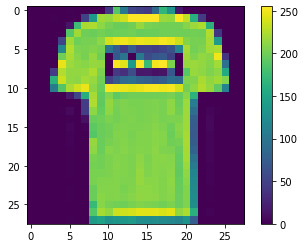

In [13]:
# take a look at what some of these images look like
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

The last step before creating our model is to *preprocess* our data by applying some prior transformations to our data before feeding it the model. In this case we will simply scale all our greyscale pixel values (0-255) to be between 0 and 1. We can do this by dividing each value in the training and testing sets by 255.0. We do this because smaller values will make it easier for the model to process our values. 

In [14]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Now it's time to build the model! We are going to use a keras *sequential* model with three different layers. This model represents a feed-forward neural network (one that passes values from left to right). We'll break down each layer and its architecture below.

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

**Layer 1:** This is our input layer and it will conist of 784 neurons. We use the flatten layer with an input shape of (28,28) to denote that our input should come in in that shape. The flatten means that our layer will reshape the shape (28,28) array into a vector of 784 neurons so that each pixel will be associated with one neuron.

**Layer 2:** This is our first and only hidden layer. The *dense* denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit activation function.

**Layer 3:** This is our output later and is also a dense layer. It has 10 neurons that we will look at to determine our models output. Each neuron represnts the probabillity of a given image being one of the 10 different classes. The activation function *softmax* is used on this layer to calculate a probabillity distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probabillity of the image being that class.

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5022 - accuracy: 0.8222
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3761 - accuracy: 0.8652
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3397 - accuracy: 0.8759
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3150 - accuracy: 0.8836
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2962 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2829 - accuracy: 0.8961
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2686 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2565 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2484 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.239

In [18]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.3432 - accuracy: 0.8810
Test accuracy: 0.8809999823570251


You'll likely notice that the accuracy here is lower than when training the model. This difference is reffered to as **overfitting**.

In [19]:
predictions = model.predict(test_images)

In [22]:
# Let's have a look at the predictions for image 1.
predictions[0]

array([1.0643537e-05, 1.3172331e-08, 1.6580207e-08, 3.2057337e-09,
       2.5487036e-06, 4.7304360e-03, 1.3850680e-06, 2.7587037e-03,
       6.0149517e-08, 9.9249613e-01], dtype=float32)

 ```argmax()``` simply returns the index of the maximium value from a numpy array. 

In [23]:
np.argmax(predictions[0])

9

In [25]:
#And we can check if this is correct by looking at the value of the cooresponding test label.
test_labels[0]

9

#### Verifying Predictions
A function here to help us verify predictions with some simple visuals.

Pick a number: 3


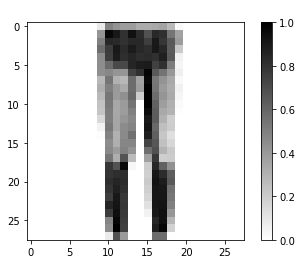

In [26]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)